In [1]:
import numpy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('C:\\Users\\Syed Abdullah Ashraf\\Desktop\\diabetes.csv')
df

,pregnancies,Plasma_glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Columns

    pregnancies - Number of times pregnant
    Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure - Diastolic blood pressure (mm Hg)
    SkinThickness - Triceps skin fold thickness (mm)
    Insulin - 2-Hour serum insulin (mu U/ml)
    BMI - Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction - Diabetes pedigree function
    Age - Age (years)
    Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for diabetes


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
# Checking class balance
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [5]:
# Checking for Null Values
df.isna().any()

pregnancies                  False
Plasma_glucose               False
BloodPressure                False
SkinThickness                False
Insulin                      False
BMI                          False
DiabetesPedigreeFunction     False
 age                         False
class                        False
dtype: bool

In [6]:
#Standarizing the input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=7)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (537, 8)
y_train Shape: (537,)
X_test Shape: (231, 8)
y_test Shape: (231,)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       147
           1       0.71      0.67      0.69        84

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



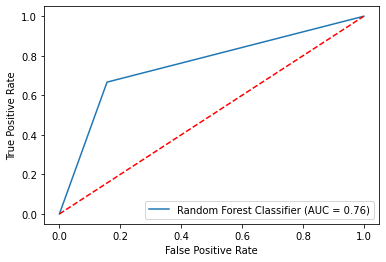

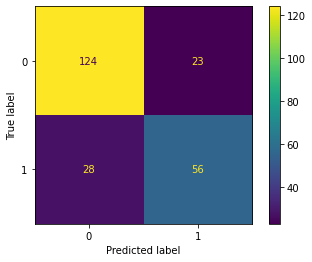

In [7]:
rf = RandomForestClassifier(random_state = 22)
model = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [8]:
x1 = sc.inverse_transform(X_test)
x1 = pd.DataFrame(x1, columns = X.columns)
y1 = y_test.reset_index()
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('RF Classifier.csv',index = False)
result

,pregnancies,Plasma_glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class,Predicted
0,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0,0,0
1,7.0,181.0,84.0,21.0,192.0,35.9,0.586,51.0,1,1
2,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0,1,1
3,6.0,93.0,50.0,30.0,64.0,28.7,0.356,23.0,0,0
4,6.0,125.0,78.0,31.0,0.0,27.6,0.565,49.0,1,1
...,...,...,...,...,...,...,...,...,...,...
226,8.0,109.0,76.0,39.0,114.0,27.9,0.640,31.0,1,1
227,4.0,137.0,84.0,0.0,0.0,31.2,0.252,30.0,0,0
228,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25.0,1,1
229,3.0,83.0,58.0,31.0,18.0,34.3,0.336,25.0,0,0


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       147
           1       0.74      0.58      0.65        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



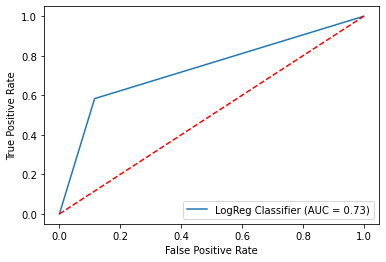

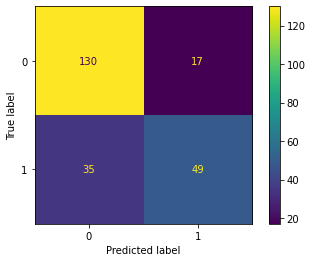

In [9]:
lr = LogisticRegression(random_state = 22)
model = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogReg Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [10]:
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('LR Classifier.csv',index = False)
result

,pregnancies,Plasma_glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,class,Predicted
0,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0,0,0
1,7.0,181.0,84.0,21.0,192.0,35.9,0.586,51.0,1,1
2,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0,1,1
3,6.0,93.0,50.0,30.0,64.0,28.7,0.356,23.0,0,0
4,6.0,125.0,78.0,31.0,0.0,27.6,0.565,49.0,1,0
...,...,...,...,...,...,...,...,...,...,...
226,8.0,109.0,76.0,39.0,114.0,27.9,0.640,31.0,1,0
227,4.0,137.0,84.0,0.0,0.0,31.2,0.252,30.0,0,0
228,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25.0,1,1
229,3.0,83.0,58.0,31.0,18.0,34.3,0.336,25.0,0,0
